![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

***Import relevant libraries***

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

***Import data and take a look***

In [64]:
# read the csv
df = pd.read_csv('bwaves.csv');
# see what it looks like
df.head()

,TimeStamp,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,...,Gyro_X,Gyro_Y,Gyro_Z,HeadBandOn,HSI_TP9,HSI_AF7,HSI_AF8,HSI_TP10,Battery,Elements
0,2022-06-24 18:33:08.771,1.629989,0.649141,0.296870,-0.012092,0.875218,0.412394,-0.044696,0.617592,1.100872,...,3.887939,-3.708496,1.091614,1.0,1.0,1.0,1.0,1.0,60.0,NaN
1,2022-06-24 18:33:08.771,1.629989,0.636427,0.282861,-0.012092,0.875218,0.389365,-0.053448,0.617592,1.100872,...,3.887939,-3.708496,1.091614,1.0,1.0,1.0,1.0,1.0,60.0,NaN
2,2022-06-24 18:33:08.773,1.629989,0.636427,0.282861,-0.012092,0.875218,0.389365,-0.053448,0.617592,1.100872,...,3.887939,-3.708496,1.091614,1.0,1.0,1.0,1.0,1.0,60.0,NaN
3,2022-06-24 18:33:08.773,1.629989,0.636427,0.282861,-0.012092,0.875218,0.389365,-0.053448,0.617592,1.100872,...,3.887939,-3.708496,1.091614,1.0,1.0,1.0,1.0,1.0,60.0,NaN
4,2022-06-24 18:33:08.773,1.629989,0.636427,0.282861,-0.012092,0.875218,0.389365,-0.053448,0.617592,1.100872,...,3.887939,-3.708496,1.091614,1.0,1.0,1.0,1.0,1.0,60.0,NaN


In [12]:
# that didn't show all the colums so let's see what the header row has
df.loc[1,:]
# the relevant channels to get to the data right away are TimeStamp through Gamma_TP10

TimeStamp          2022-06-24 18:33:08.771
Delta_TP9                         1.629989
Delta_AF7                         0.636427
Delta_AF8                         0.282861
Delta_TP10                       -0.012092
Theta_TP9                         0.875218
Theta_AF7                         0.389365
Theta_AF8                        -0.053448
Theta_TP10                        0.617592
Alpha_TP9                         1.100872
Alpha_AF7                         0.291663
Alpha_AF8                         0.131475
Alpha_TP10                        0.307768
Beta_TP9                          1.024696
Beta_AF7                          0.116442
Beta_AF8                           -0.1751
Beta_TP10                         0.317769
Gamma_TP9                         0.528071
Gamma_AF7                        -0.432671
Gamma_AF8                        -0.407275
Gamma_TP10                       -0.103959
RAW_TP9                          1121.3553
RAW_AF7                           779.2674
RAW_AF8    

***Calculate mean per brainwave type***

In [49]:
# create dataframes by filtering df
D = df.filter(['Delta_AF7','Delta_AF8','Delta_TP10','Delta_TP9'], axis=1)
T = df.filter(['Theta_AF7','Theta_AF8','Theta_TP10','Theta_TP9'], axis=1)
A = df.filter(['Alpha_AF7','Alpha_AF8','Alpha_TP10','Alpha_TP9'], axis=1)
B = df.filter(['Beta_AF7','Beta_AF8','Beta_TP10','Beta_TP9'], axis=1)
G = df.filter(['Gamma_AF7','Gamma_AF8','Gamma_TP9',"Gamma_TP10"], axis=1)

# create a new column in each of the dataframes with their mean values
D['Delta_mean'] = D.mean(axis=1)
T['Theta_mean'] = T.mean(axis=1)
A['Alpha_mean'] = A.mean(axis=1)
B['Beta_mean'] = B.mean(axis=1)
G['Gamma_mean'] = G.mean(axis=1)

***Plot results***

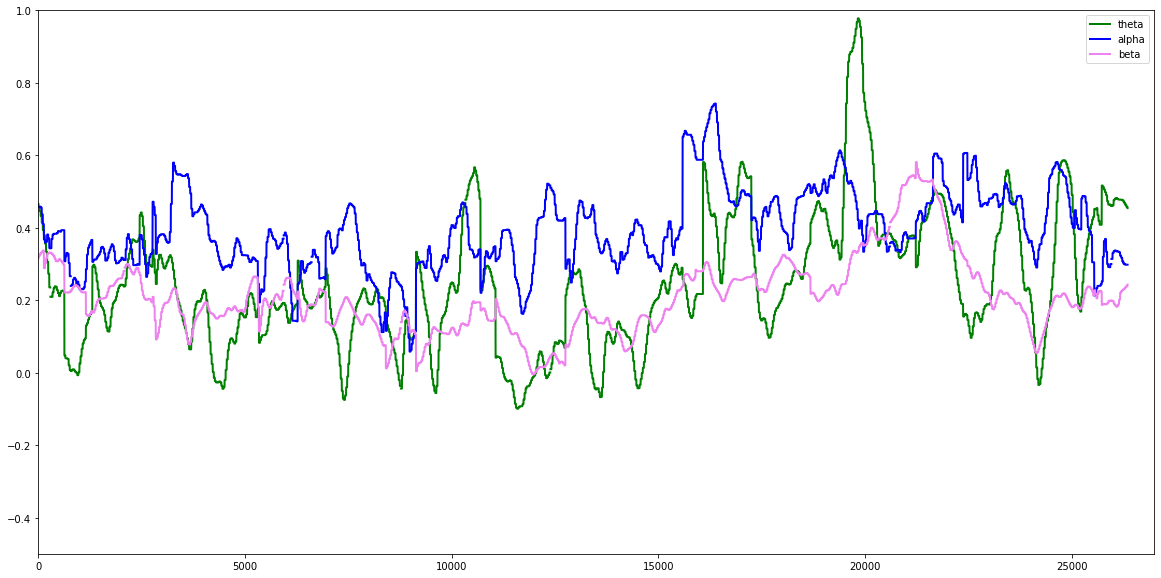

In [72]:
# plot
plt.rcParams['figure.figsize'] = [20, 10]
fig, ax = plt.subplots()

#ax.plot(D['Delta_mean'], linewidth=2.0, color ="r", label="delta")
ax.plot(T['Theta_mean'], linewidth=2.0, color ="g", label="theta")
ax.plot(A['Alpha_mean'], linewidth=2.0, color ="b", label="alpha")
ax.plot(B['Beta_mean'], linewidth=2.0, color ="violet", label="beta")
#ax.plot(G['Gamma_mean'], linewidth=2.0, color="pink", label="gamma" )


ax.set(xlim=(0, 27000),
       ylim=(-0.5, 1))

ax.legend()
plt.show()
